# Employer Project - Cycling in London

In [1]:
# Import necessary packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Directory
!pwd

/Users/hazel/Documents/LSE Data Analytics/Employer Project/LSE_DA_Employer_Project_2_London


In [3]:
dir = "/Users/hazel/Documents/LSE Data Analytics/Employer Project/LSE_DA_Employer_Project_2_London"

# Do people have a preference for private cycles vs cycle hires?
## Central London

In [4]:
# Load dataset
central_ldn = pd.read_csv(dir + "/London/Central London.csv")

central_ldn.head()

/Users/hazel/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Survey wave (calendar quarter),Equivalent financial quarter,Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6.0,15.0,15.0,0.0,15.0,NaN,NaN,NaN
2,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6.0,30.0,35.0,0.0,35.0,NaN,NaN,NaN
3,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6.0,45.0,59.0,2.0,61.0,NaN,NaN,NaN
4,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7.0,0.0,73.0,0.0,73.0,NaN,NaN,NaN


In [5]:
central_ldn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048366 entries, 0 to 1048365
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Survey wave (calendar quarter)  758163 non-null  object 
 1   Equivalent financial quarter    758163 non-null  object 
 2   Site ID                         758163 non-null  object 
 3   Location                        758163 non-null  object 
 4   Survey date                     748007 non-null  object 
 5   Weather                         746329 non-null  object 
 6   Time                            758163 non-null  object 
 7   Period                          758163 non-null  object 
 8   Direction                       758163 non-null  object 
 9   Start hour                      758163 non-null  float64
 10  Start minute                    758163 non-null  float64
 11  Number of private cycles        758099 non-null  float64
 12  Number of cycl

In [6]:
# Identify missing values
central_ldn.isna().sum()

Survey wave (calendar quarter)     290203
Equivalent financial quarter       290203
Site ID                            290203
Location                           290203
Survey date                        300359
Weather                            302037
Time                               290203
Period                             290203
Direction                          290203
Start hour                         290203
Start minute                       290203
Number of private cycles           290267
Number of cycle hire bikes         290267
Total cycles                       290203
Unnamed: 14                       1048366
Unnamed: 15                       1048366
Unnamed: 16                       1048366
dtype: int64

In [7]:
# Create subset with relevant variables
# QoQ trend of total cycle hires, split by public vs private
subset_central = central_ldn[['Survey wave (calendar quarter)','Location','Direction','Number of private cycles','Number of cycle hire bikes','Total cycles', 'Weather']].copy()

subset_central.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048366 entries, 0 to 1048365
Data columns (total 7 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Survey wave (calendar quarter)  758163 non-null  object 
 1   Location                        758163 non-null  object 
 2   Direction                       758163 non-null  object 
 3   Number of private cycles        758099 non-null  float64
 4   Number of cycle hire bikes      758099 non-null  float64
 5   Total cycles                    758163 non-null  float64
 6   Weather                         746329 non-null  object 
dtypes: float64(3), object(4)
memory usage: 56.0+ MB


In [8]:
subset_central.head()

,Survey wave (calendar quarter),Location,Direction,Number of private cycles,Number of cycle hire bikes,Total cycles,Weather
0,2014 Q1 (January-March),Millbank (south of Thorney Street),Northbound,0.0,0.0,0.0,Dry
1,2014 Q1 (January-March),Millbank (south of Thorney Street),Northbound,15.0,0.0,15.0,Dry
2,2014 Q1 (January-March),Millbank (south of Thorney Street),Northbound,35.0,0.0,35.0,Dry
3,2014 Q1 (January-March),Millbank (south of Thorney Street),Northbound,59.0,2.0,61.0,Dry
4,2014 Q1 (January-March),Millbank (south of Thorney Street),Northbound,73.0,0.0,73.0,Dry


In [9]:
subset_central.isna().sum()

Survey wave (calendar quarter)    290203
Location                          290203
Direction                         290203
Number of private cycles          290267
Number of cycle hire bikes        290267
Total cycles                      290203
Weather                           302037
dtype: int64

In [11]:
# Replace missing values
subset_central.fillna(0,inplace=True)

In [25]:
subset_central.isna().sum()

Survey Quarter                0
Location                      0
Direction                     0
Number of private cycles      0
Number of cycle hire bikes    0
Total cycles                  0
Weather                       0
dtype: int64

In [12]:
subset_central

,Survey wave (calendar quarter),Location,Direction,Number of private cycles,Number of cycle hire bikes,Total cycles,Weather
0,2014 Q1 (January-March),Millbank (south of Thorney Street),Northbound,0.0,0.0,0.0,Dry
1,2014 Q1 (January-March),Millbank (south of Thorney Street),Northbound,15.0,0.0,15.0,Dry
2,2014 Q1 (January-March),Millbank (south of Thorney Street),Northbound,35.0,0.0,35.0,Dry
3,2014 Q1 (January-March),Millbank (south of Thorney Street),Northbound,59.0,2.0,61.0,Dry
4,2014 Q1 (January-March),Millbank (south of Thorney Street),Northbound,73.0,0.0,73.0,Dry
...,...,...,...,...,...,...,...
1048361,0,0,0,0.0,0.0,0.0,0
1048362,0,0,0,0.0,0.0,0.0,0
1048363,0,0,0,0.0,0.0,0.0,0
1048364,0,0,0,0.0,0.0,0.0,0


# Time Series

In [14]:
# Rename column
subset_central.rename(columns = {'Survey wave (calendar quarter)':'Survey Quarter'}, inplace = True)

In [17]:
subset_central.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048366 entries, 0 to 1048365
Data columns (total 7 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Survey Quarter              1048366 non-null  object 
 1   Location                    1048366 non-null  object 
 2   Direction                   1048366 non-null  object 
 3   Number of private cycles    1048366 non-null  float64
 4   Number of cycle hire bikes  1048366 non-null  float64
 5   Total cycles                1048366 non-null  float64
 6   Weather                     1048366 non-null  object 
dtypes: float64(3), object(4)
memory usage: 56.0+ MB


In [23]:
# Create subset without zero
subset_central_time = subset_central.loc[subset_central['Survey Quarter'] != 0, :]

subset_central_time

,Survey Quarter,Location,Direction,Number of private cycles,Number of cycle hire bikes,Total cycles,Weather
0,2014 Q1 (January-March),Millbank (south of Thorney Street),Northbound,0.0,0.0,0.0,Dry
1,2014 Q1 (January-March),Millbank (south of Thorney Street),Northbound,15.0,0.0,15.0,Dry
2,2014 Q1 (January-March),Millbank (south of Thorney Street),Northbound,35.0,0.0,35.0,Dry
3,2014 Q1 (January-March),Millbank (south of Thorney Street),Northbound,59.0,2.0,61.0,Dry
4,2014 Q1 (January-March),Millbank (south of Thorney Street),Northbound,73.0,0.0,73.0,Dry
...,...,...,...,...,...,...,...
758158,2021 Q4 (October-December),Haymarket,Southbound,22.0,1.0,23.0,Dry
758159,2021 Q4 (October-December),Haymarket,Southbound,20.0,0.0,20.0,Dry
758160,2021 Q4 (October-December),Haymarket,Southbound,16.0,1.0,17.0,Dry
758161,2021 Q4 (October-December),Haymarket,Southbound,10.0,1.0,11.0,Dry


In [10]:
# Remove missing values
# subset_central.dropna(inplace = True)

In [37]:
# Split survey quarter
subset_central_time[['Year-Quarter','Month-Period']] = subset_central_time['Survey Quarter'].str.split('(', n = 1, expand = True)

In [38]:
subset_central_time[['Month-Period']] = subset_central_time[['Month-Period']].astype(str)

subset_central_time[['Month-Period']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 758163 entries, 0 to 758162
Data columns (total 1 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Month-Period  758163 non-null  object
dtypes: object(1)
memory usage: 11.6+ MB


In [39]:
subset_central_time

,Survey Quarter,Location,Direction,Number of private cycles,Number of cycle hire bikes,Total cycles,Weather,Year-Quarter,Month-Period,Year,Quarter
0,2014 Q1 (January-March),Millbank (south of Thorney Street),Northbound,0.0,0.0,0.0,Dry,2014 Q1,January-March),2014,Q1
1,2014 Q1 (January-March),Millbank (south of Thorney Street),Northbound,15.0,0.0,15.0,Dry,2014 Q1,January-March),2014,Q1
2,2014 Q1 (January-March),Millbank (south of Thorney Street),Northbound,35.0,0.0,35.0,Dry,2014 Q1,January-March),2014,Q1
3,2014 Q1 (January-March),Millbank (south of Thorney Street),Northbound,59.0,2.0,61.0,Dry,2014 Q1,January-March),2014,Q1
4,2014 Q1 (January-March),Millbank (south of Thorney Street),Northbound,73.0,0.0,73.0,Dry,2014 Q1,January-March),2014,Q1
...,...,...,...,...,...,...,...,...,...,...,...
758158,2021 Q4 (October-December),Haymarket,Southbound,22.0,1.0,23.0,Dry,2021 Q4,October-December),2021,Q4
758159,2021 Q4 (October-December),Haymarket,Southbound,20.0,0.0,20.0,Dry,2021 Q4,October-December),2021,Q4
758160,2021 Q4 (October-December),Haymarket,Southbound,16.0,1.0,17.0,Dry,2021 Q4,October-December),2021,Q4
758161,2021 Q4 (October-December),Haymarket,Southbound,10.0,1.0,11.0,Dry,2021 Q4,October-December),2021,Q4


In [28]:
# Aggregate table
qoq = subset_central_time.groupby(['Year-Quarter']).sum().reset_index().copy()

qoq

,Year-Quarter,Number of private cycles,Number of cycle hire bikes,Total cycles
0,2014 Q1,312474.0,30870.0,343344.0
1,2014 Q2,393458.0,46473.0,439931.0
2,2014 Q3,404313.0,52278.0,456591.0
3,2014 Q4,326723.0,37050.0,363773.0
4,2015 Q1,316689.0,34155.0,350844.0
5,2015 Q2,399727.0,47189.0,446916.0
6,2015 Q3,400061.0,49344.0,449405.0
7,2015 Q4,349445.0,39891.0,389336.0
8,2016 Q1,333865.0,36287.0,370152.0
9,2016 Q2,405495.0,47281.0,452776.0


In [29]:
# Split survey quarter
qoq[['Year','Quarter']] = qoq['Year-Quarter'].str.split(' ', n = 1, expand = True)

qoq

,Year-Quarter,Number of private cycles,Number of cycle hire bikes,Total cycles,Year,Quarter
0,2014 Q1,312474.0,30870.0,343344.0,2014,Q1
1,2014 Q2,393458.0,46473.0,439931.0,2014,Q2
2,2014 Q3,404313.0,52278.0,456591.0,2014,Q3
3,2014 Q4,326723.0,37050.0,363773.0,2014,Q4
4,2015 Q1,316689.0,34155.0,350844.0,2015,Q1
5,2015 Q2,399727.0,47189.0,446916.0,2015,Q2
6,2015 Q3,400061.0,49344.0,449405.0,2015,Q3
7,2015 Q4,349445.0,39891.0,389336.0,2015,Q4
8,2016 Q1,333865.0,36287.0,370152.0,2016,Q1
9,2016 Q2,405495.0,47281.0,452776.0,2016,Q2


In [30]:
# Convert year datatype to integer
qoq['Year'] = qoq['Year'].astype(int)

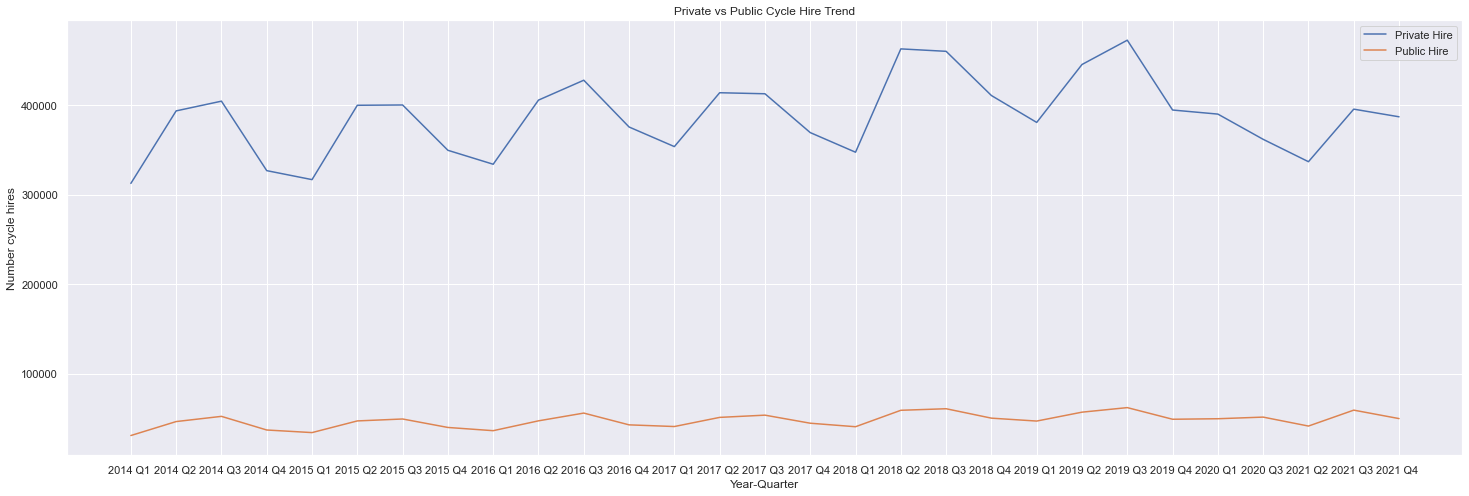

In [32]:
fig, ax = plt.subplots()
ax = sns.lineplot(data = qoq, x = 'Year-Quarter', y = 'Number of private cycles')
ax1 = sns.lineplot(data = qoq, x = 'Year-Quarter', y = 'Number of cycle hire bikes')\
.set(title='Private vs Public Cycle Hire Trend', ylabel = 'Number cycle hires')
plt.legend(labels = ['Private Hire','Public Hire'])

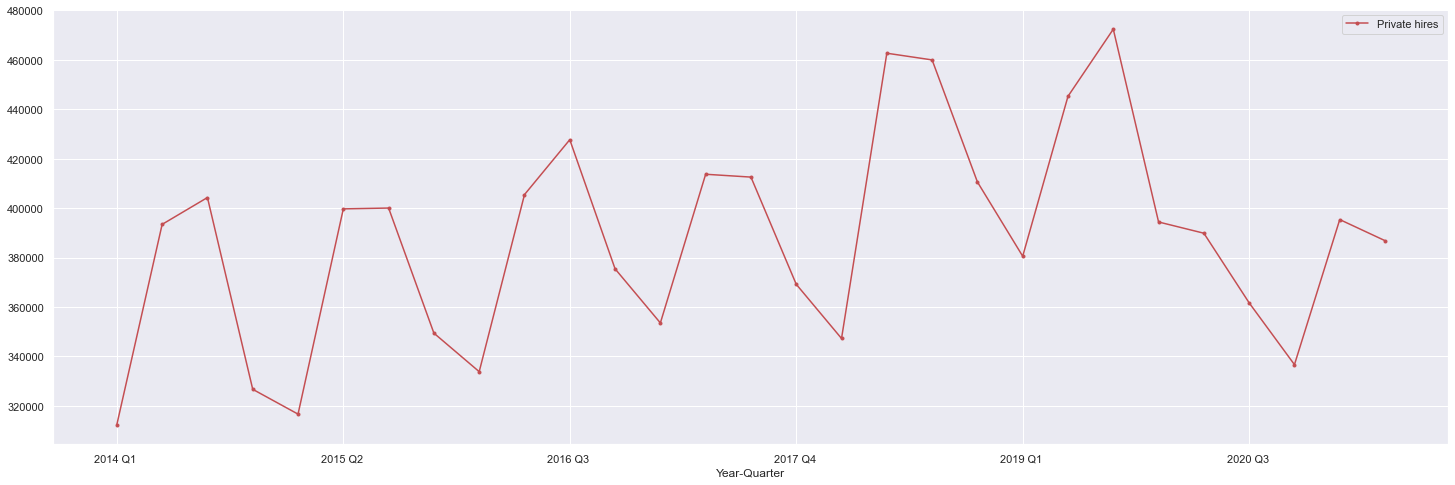

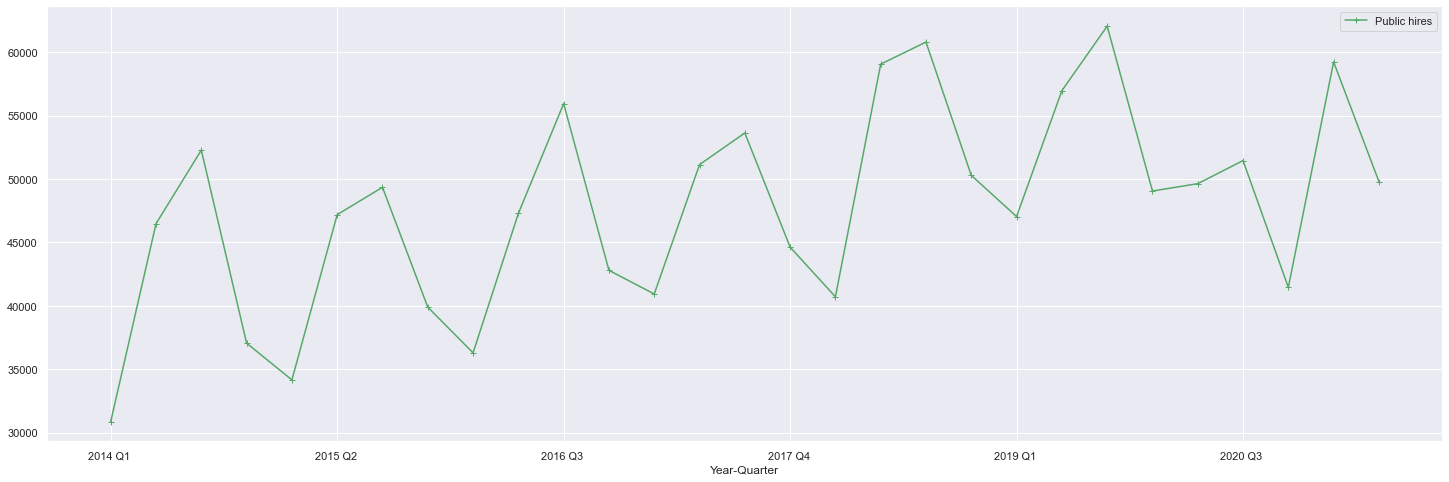

In [34]:
# multiple lines with legend
qoq.plot('Year-Quarter', 'Number of private cycles', marker='.', color='r', label= 'Private hires')
qoq.plot('Year-Quarter', 'Number of cycle hire bikes', marker = '+', color = 'g',label = 'Public hires')
plt.legend();

[Text(0.5, 1.0, 'Total Cycles hire Trend 2014 to 2021')]

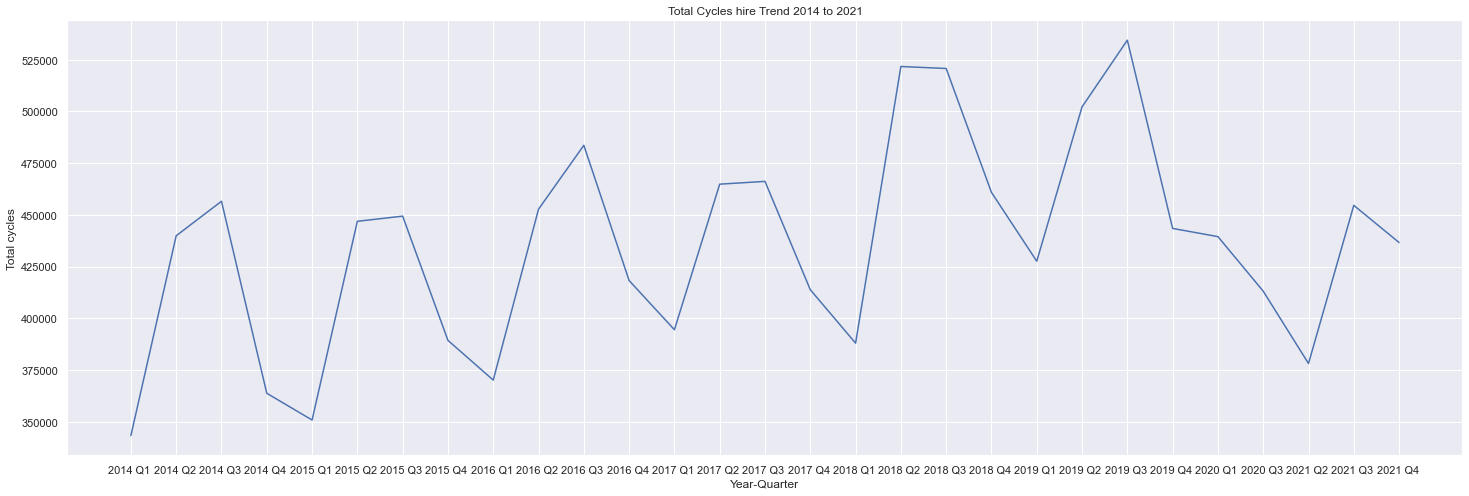

In [31]:
# Plot Total Cycles Trend line
sns.set(rc = {'figure.figsize':(25,8)})
sns.lineplot(data = qoq, x = 'Year-Quarter', y = 'Total cycles')\
.set(title='Total Cycles hire Trend 2014 to 2021')

[Text(0.5, 1.0, 'Quarterly Hire Trend from 2014 to 2021')]

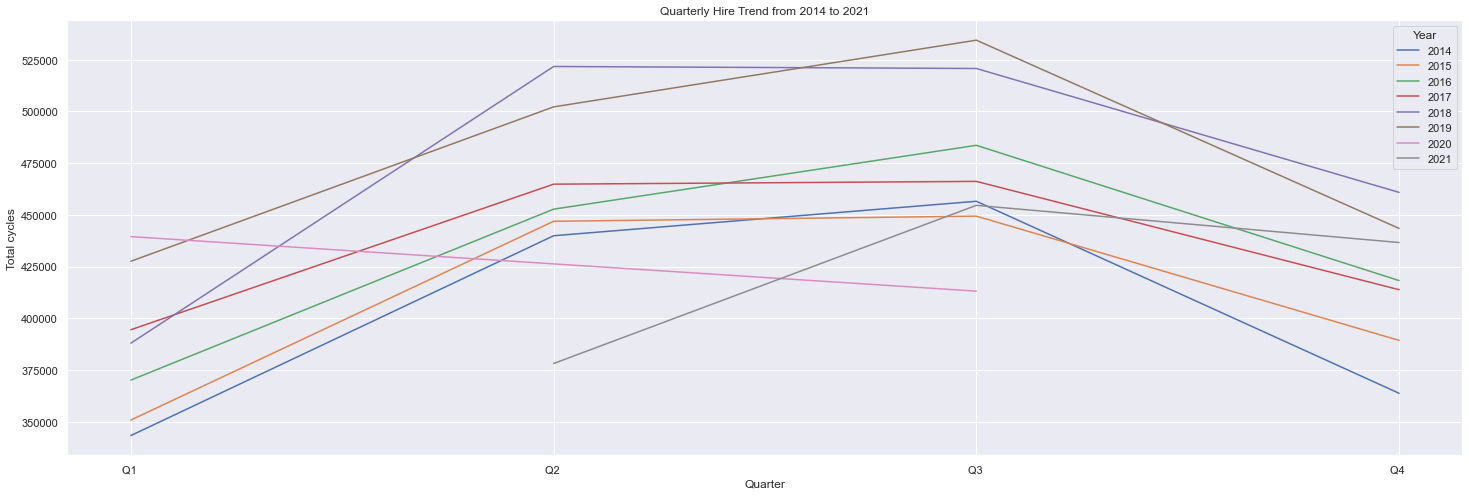

In [80]:
# Plot Quarterly Total Cycles for each year
sns.lineplot(data = qoq, x = 'Quarter', y = 'Total cycles', hue = 'Year')\
.set(title='Quarterly Hire Trend from 2014 to 2021')

The consistance trend each year from 2014 to 2021, Q2 and Q3 are the peaks of cycle hires, which may be due to warmer weather conditions in the year.

[Text(0.5, 1.0, 'Quarterly Hire Trend from 2014 to 2021')]

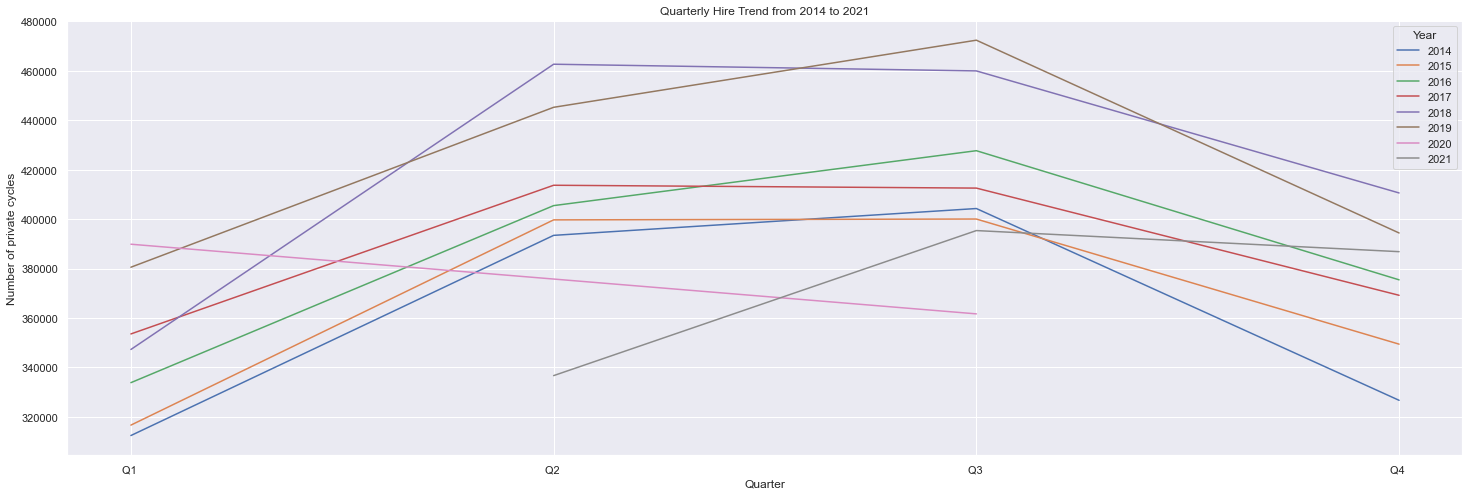

In [83]:
# Plot Quarterly Private Cycles for each year
sns.lineplot(data = qoq, x = 'Quarter', y = 'Number of private cycles', hue = 'Year')\
.set(title='Quarterly Hire Trend from 2014 to 2021')

## Change in trend in recent years 2018 - 2021 

In [101]:
subset_year = qoq[qoq['Year'] > 2017]

subset_year

,Year-Quarter,Number of private cycles,Number of cycle hire bikes,Total cycles,Year,Quarter
16,2018 Q1,347294.0,40709.0,388003.0,2018,Q1
17,2018 Q2,462698.0,59058.0,521756.0,2018,Q2
18,2018 Q3,459989.0,60799.0,520788.0,2018,Q3
19,2018 Q4,410613.0,50285.0,460898.0,2018,Q4
20,2019 Q1,380570.0,47035.0,427605.0,2019,Q1
21,2019 Q2,445267.0,56964.0,502231.0,2019,Q2
22,2019 Q3,472421.0,62051.0,534472.0,2019,Q3
23,2019 Q4,394422.0,49050.0,443472.0,2019,Q4
24,2020 Q1,389876.0,49630.0,439506.0,2020,Q1
25,2020 Q3,361695.0,51450.0,413145.0,2020,Q3


[Text(0.5, 1.0, 'Quarterly Hire Trend from 2018 to 2021')]

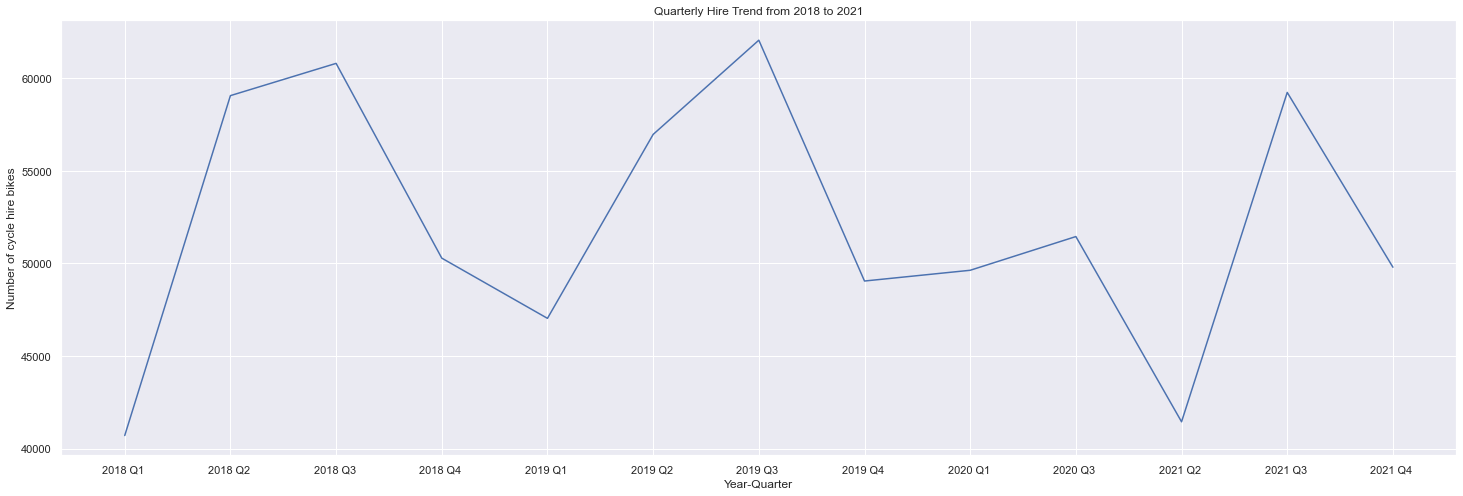

In [104]:
# Plot Quarterly Public Cycles for each year
sns.lineplot(data = subset_year, x = 'Year-Quarter', y = 'Number of cycle hire bikes')\
.set(title='Quarterly Hire Trend from 2018 to 2021')

[Text(0.5, 1.0, 'Quarterly Hire Trend from 2018 to 2021')]

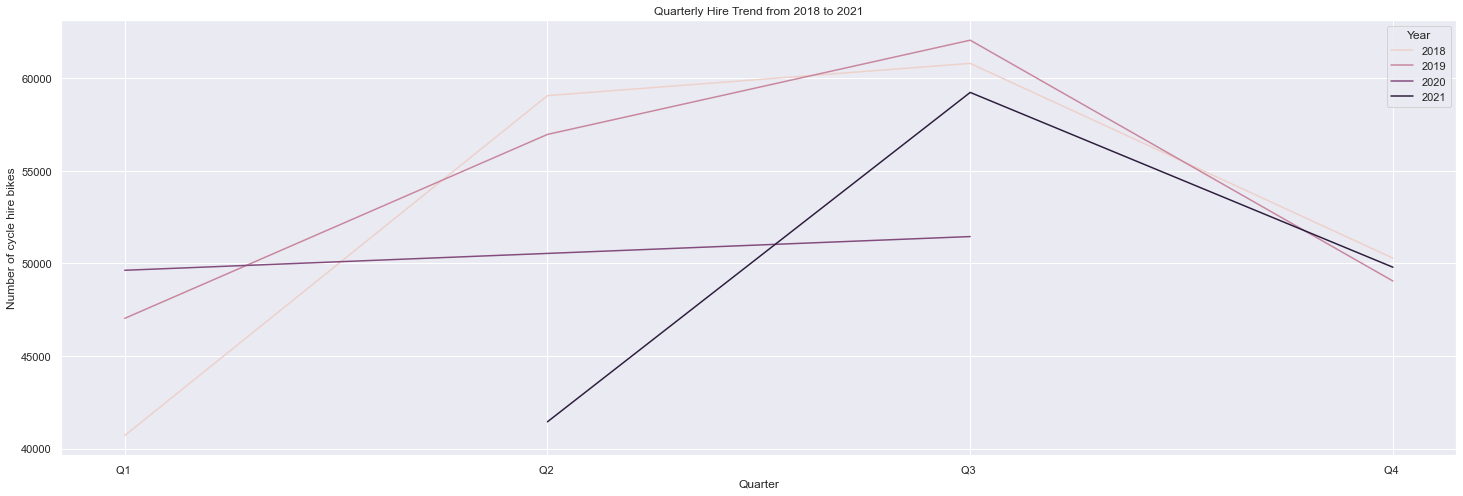

In [103]:
# Plot Quarterly Public Cycles for each year
sns.lineplot(data = subset_year, x = 'Quarter', y = 'Number of cycle hire bikes', hue = 'Year')\
.set(title='Quarterly Hire Trend from 2018 to 2021')

[Text(0.5, 1.0, 'Quarterly Private Hire Trend from 2018 to 2021')]

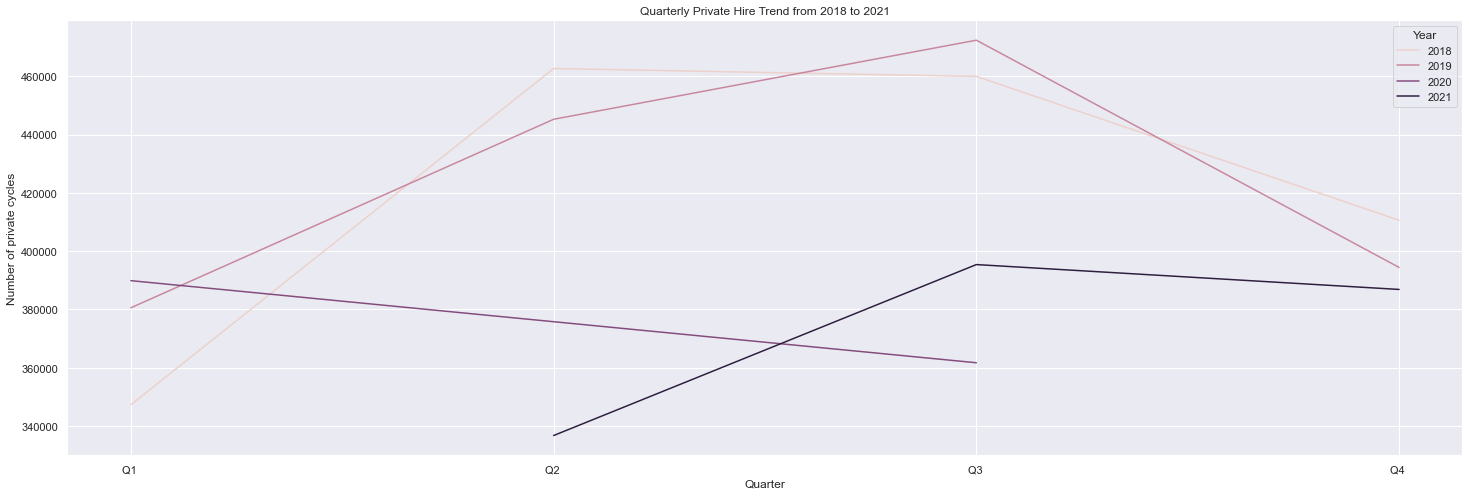

In [106]:
# Plot Quarterly Private Cycles for each year
sns.lineplot(data = subset_year, x = 'Quarter', y = 'Number of private cycles', hue = 'Year')\
.set(title='Quarterly Private Hire Trend from 2018 to 2021')

# Public vs Private Hires aggregated by Year

In [41]:
# View dataframe
subset_central_time

,Survey Quarter,Location,Direction,Number of private cycles,Number of cycle hire bikes,Total cycles,Weather,Year-Quarter,Month-Period,Year,Quarter
0,2014 Q1 (January-March),Millbank (south of Thorney Street),Northbound,0.0,0.0,0.0,Dry,2014 Q1,January-March),2014,Q1
1,2014 Q1 (January-March),Millbank (south of Thorney Street),Northbound,15.0,0.0,15.0,Dry,2014 Q1,January-March),2014,Q1
2,2014 Q1 (January-March),Millbank (south of Thorney Street),Northbound,35.0,0.0,35.0,Dry,2014 Q1,January-March),2014,Q1
3,2014 Q1 (January-March),Millbank (south of Thorney Street),Northbound,59.0,2.0,61.0,Dry,2014 Q1,January-March),2014,Q1
4,2014 Q1 (January-March),Millbank (south of Thorney Street),Northbound,73.0,0.0,73.0,Dry,2014 Q1,January-March),2014,Q1
...,...,...,...,...,...,...,...,...,...,...,...
758158,2021 Q4 (October-December),Haymarket,Southbound,22.0,1.0,23.0,Dry,2021 Q4,October-December),2021,Q4
758159,2021 Q4 (October-December),Haymarket,Southbound,20.0,0.0,20.0,Dry,2021 Q4,October-December),2021,Q4
758160,2021 Q4 (October-December),Haymarket,Southbound,16.0,1.0,17.0,Dry,2021 Q4,October-December),2021,Q4
758161,2021 Q4 (October-December),Haymarket,Southbound,10.0,1.0,11.0,Dry,2021 Q4,October-December),2021,Q4


In [42]:
# Aggregate by year
year_total = subset_central_time.groupby(['Year']).sum().reset_index().copy()

year_total

,Year,Number of private cycles,Number of cycle hire bikes,Total cycles
0,2014,1436968.0,166671.0,1603639.0
1,2015,1465922.0,170579.0,1636501.0
2,2016,1542540.0,182302.0,1724842.0
3,2017,1549098.0,190316.0,1739414.0
4,2018,1680594.0,210851.0,1891445.0
5,2019,1692680.0,215100.0,1907780.0
6,2020,751571.0,101080.0,852651.0
7,2021,1118970.0,150477.0,1269447.0


[Text(0.5, 1.0, 'Yearly Public hires')]

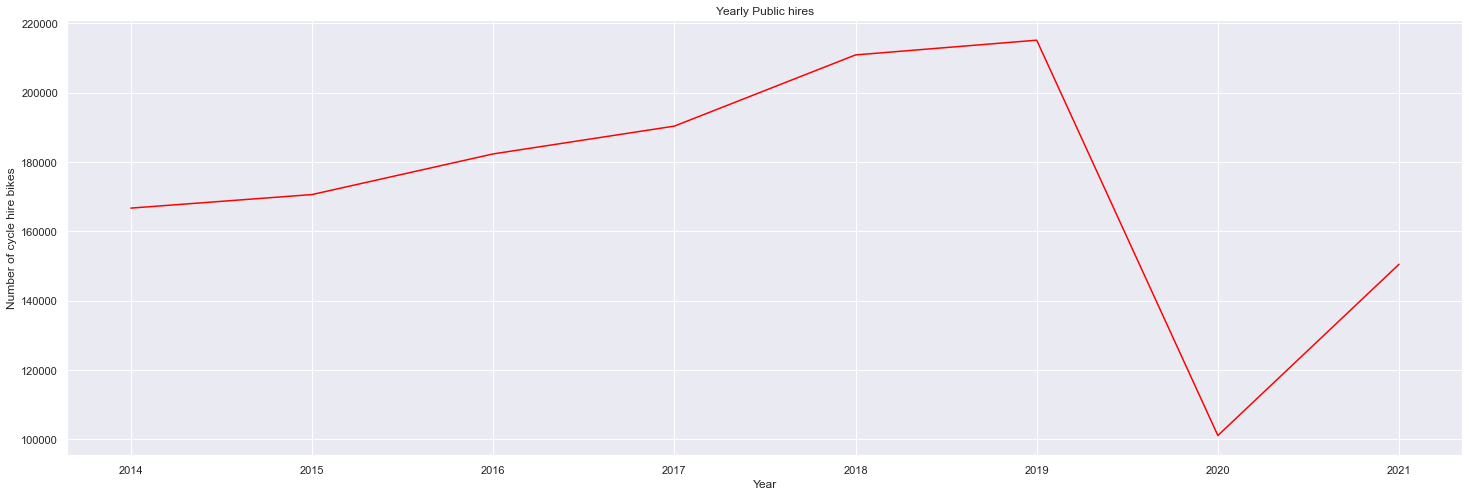

In [43]:
# Public Hires each year
sns.lineplot(data = year_total, y = 'Number of cycle hire bikes', x = 'Year', color = 'red')\
.set(title='Yearly Public hires')

[Text(0.5, 1.0, 'Yearly Public hires')]

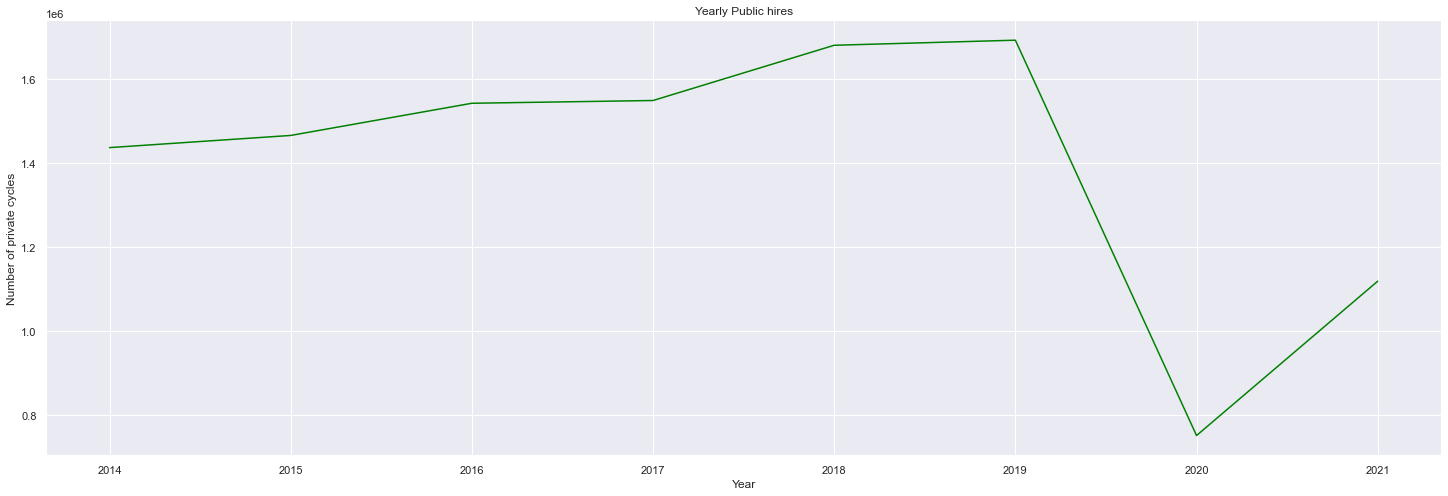

In [44]:
# Private Hires each year
sns.lineplot(data = year_total, y = 'Number of private cycles', x = 'Year', color = 'green')\
.set(title='Yearly Public hires')

There is a significant drop in total number of cycle hires in 2020, which may be due to covid lockdown restricting people to travel and had to stay in their homes.

<AxesSubplot:xlabel='Year'>

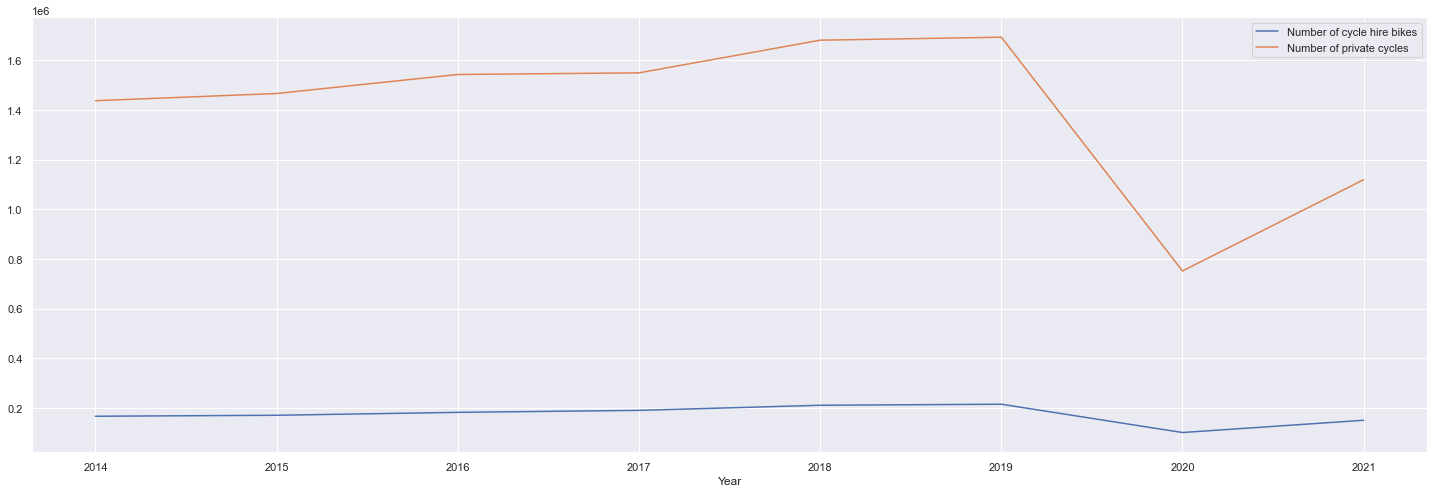

In [46]:
# Private vs Public Cycle hires
year_total.plot('Year', ['Number of cycle hire bikes','Number of private cycles'])

Overall, number of private cycles are much more than public hires. This means majority who cycles own their own bicycles. To increase the update of cycling, the government should target citizens using other modes of transport and convert them to cycling.

# Cycle hires aggregated by Direction

In [47]:
subset_central_time.head()

,Survey Quarter,Location,Direction,Number of private cycles,Number of cycle hire bikes,Total cycles,Weather,Year-Quarter,Month-Period,Year,Quarter
0,2014 Q1 (January-March),Millbank (south of Thorney Street),Northbound,0.0,0.0,0.0,Dry,2014 Q1,January-March),2014,Q1
1,2014 Q1 (January-March),Millbank (south of Thorney Street),Northbound,15.0,0.0,15.0,Dry,2014 Q1,January-March),2014,Q1
2,2014 Q1 (January-March),Millbank (south of Thorney Street),Northbound,35.0,0.0,35.0,Dry,2014 Q1,January-March),2014,Q1
3,2014 Q1 (January-March),Millbank (south of Thorney Street),Northbound,59.0,2.0,61.0,Dry,2014 Q1,January-March),2014,Q1
4,2014 Q1 (January-March),Millbank (south of Thorney Street),Northbound,73.0,0.0,73.0,Dry,2014 Q1,January-March),2014,Q1


In [48]:
subset_central_time['Direction'].value_counts()

Southbound    204961
Northbound    204800
Westbound     174234
Eastbound     174168
Name: Direction, dtype: int64

[Text(0.5, 1.0, 'Yearly Public hires Split by Direction')]

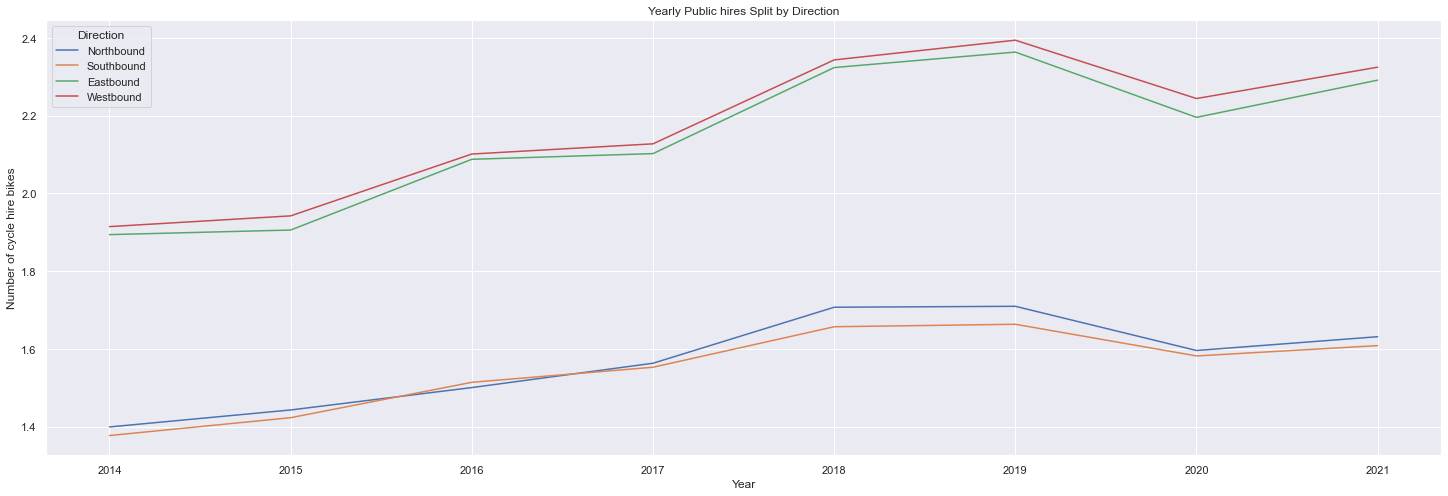

In [49]:
# Plot Public hires split by direction
sns.lineplot(data = subset_central_time, y = 'Number of cycle hire bikes', x = 'Year', hue = 'Direction', ci = None)\
.set(title='Yearly Public hires Split by Direction')

[Text(0.5, 1.0, 'Yearly Private Cycles Split by Direction')]

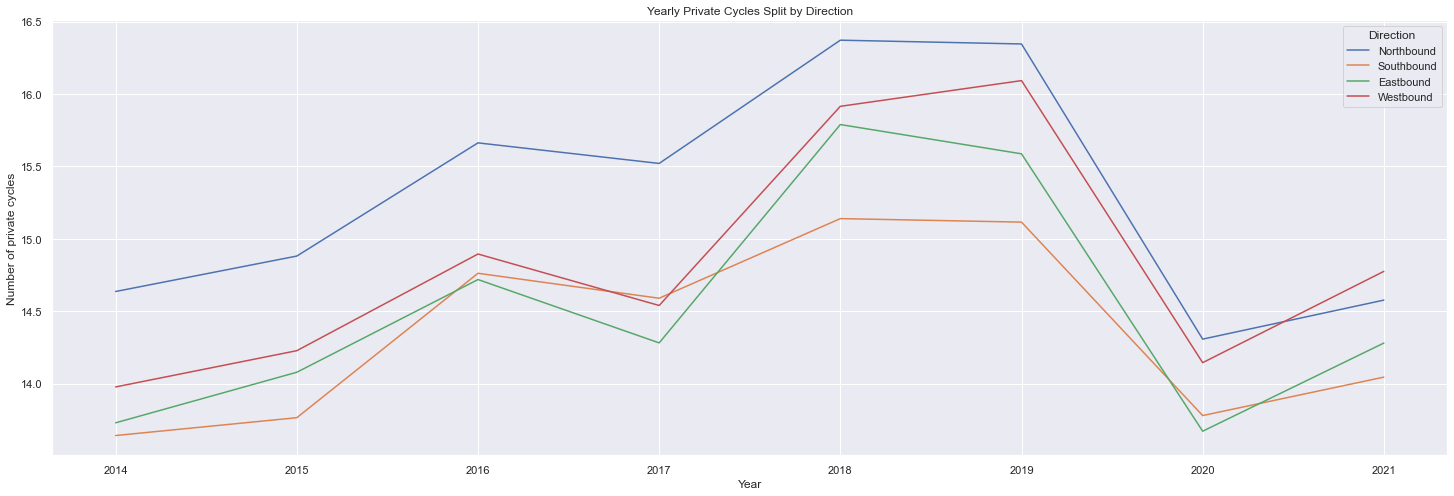

In [54]:
# Plot Private Cycles split by direction
sns.lineplot(data = subset_central_time, y = 'Number of private cycles', x = 'Year', hue = 'Direction', ci = None)\
.set(title='Yearly Private Cycles Split by Direction')

More people use public cycles to travel in eastbound and westbound direction, while more people use private cycles for northbound and westbound hires. Does this mean there are less public cycles avaliable in in Northbound?

<AxesSubplot:xlabel='Direction', ylabel='Number of private cycles'>

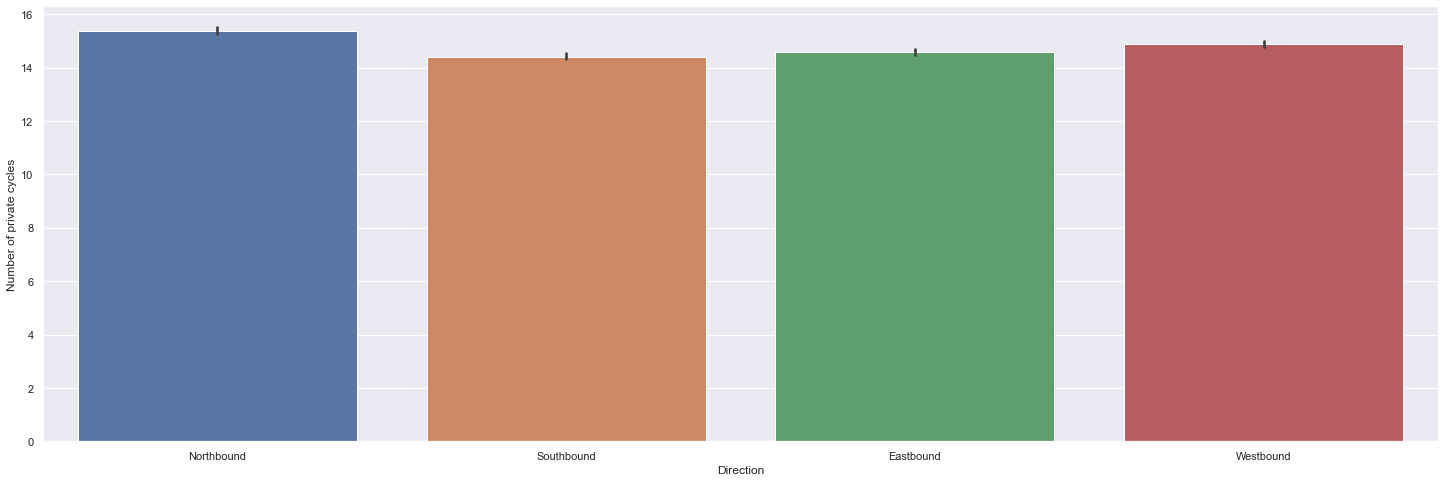

In [52]:
# Total cycle in each direction 2014-2018
sns.barplot(data = subset_central_time, y = 'Number of private cycles', x = 'Direction')

# Cycle hires with Weather

In [55]:
subset_central_time['Weather'].value_counts()

Dry                   620585
Wet                    78326
Fine                   18846
0                      11834
Rain                    5408
                       ...  
Wet And Very Windy         2
Dry 3/4 Dry                2
Wet First Then Dry         2
Fine Windy                 2
Windy/cloudy               2
Name: Weather, Length: 284, dtype: int64

[Text(0.5, 1.0, 'Yearly Public hires Split by Direction')]

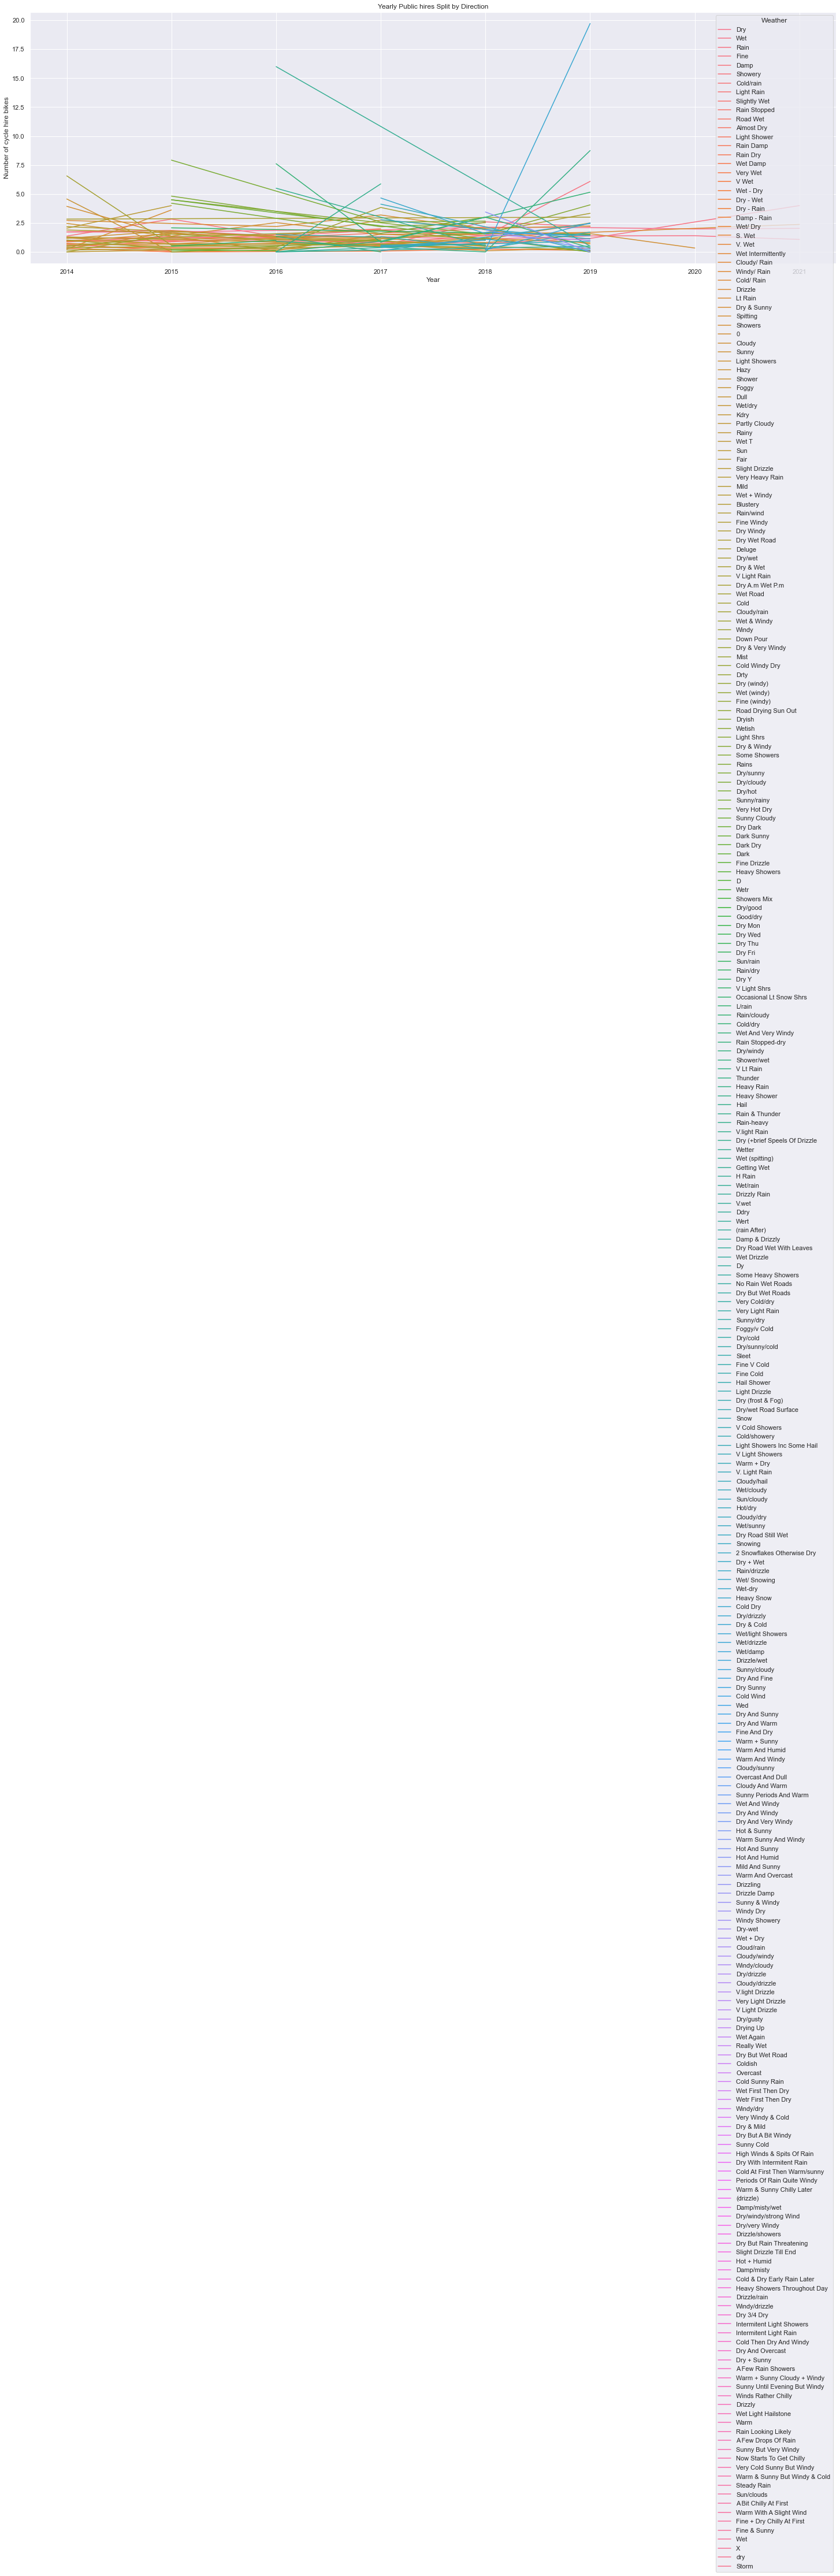

In [56]:
# Plot Public hires split by direction
sns.lineplot(data = subset_central_time, y = 'Number of cycle hire bikes', x = 'Year', hue = 'Weather', ci = None)\
.set(title='Yearly Public hires Split by Direction')

In [14]:
#Load dataset
biking = pd.read_excel(dir + "/London/Biking sites.xlsx")

biking.head()

,UnqID,ProgID,SurveyDescription,Easting,Northing,Location,Borough,Functional cycling area
0,CENCY001,CENCY,Central area cycle surveys,530251.49,178742.45,Millbank (south of Thorney Street),Westminster,Central
1,CENCY002,CENCY,Central area cycle surveys,533362.68,181824.45,Bishopsgate,City of London,Central
2,CENCY003,CENCY,Central area cycle surveys,532334.06,180520.37,Southwark Bridge,Southwark,Central
3,CENCY004,CENCY,Central area cycle surveys,532052.50,179677.64,Southwark Bridge Road,Southwark,Central
4,CENCY005,CENCY,Central area cycle surveys,533031.59,180213.46,Tooley Street,Southwark,Central


In [15]:
biking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023 entries, 0 to 2022
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UnqID                    2023 non-null   object 
 1   ProgID                   2023 non-null   object 
 2   SurveyDescription        2023 non-null   object 
 3   Easting                  2023 non-null   float64
 4   Northing                 2023 non-null   float64
 5   Location                 2023 non-null   object 
 6   Borough                  2023 non-null   object 
 7   Functional cycling area  2021 non-null   object 
dtypes: float64(2), object(6)
memory usage: 126.6+ KB


In [24]:
biking.isna().sum()

UnqID                      0
ProgID                     0
SurveyDescription          0
Easting                    0
Northing                   0
Location                   0
Borough                    0
Functional cycling area    2
dtype: int64

In [16]:
# Load dataset
inner_ldn = pd.read_csv(dir + "/London/Inner London.csv")

inner_ldn.head()

/Users/hazel/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (1,2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Survey wave (year),Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles
0,2015.0,INNCY001,Grove Road,"mer, 20/05/15",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,1.0,0.0,1.0
1,2015.0,INNCY001,Grove Road,"mer, 20/05/15",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6.0,15.0,2.0,0.0,2.0
2,2015.0,INNCY001,Grove Road,"mer, 20/05/15",Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6.0,30.0,2.0,0.0,2.0
3,2015.0,INNCY001,Grove Road,"mer, 20/05/15",Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6.0,45.0,4.0,0.0,4.0
4,2015.0,INNCY001,Grove Road,"mer, 20/05/15",Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7.0,0.0,4.0,0.0,4.0


In [20]:
# Load dataset
outer_ldn = pd.read_csv(dir + "/London/Outer London.csv")

outer_ldn.head()

,Survey wave (year),Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of male cycles,Number of female cycles,Number of unknown cycles,Total cycles
0,2015,OUTCY001,High Road Leyton,"ven, 26/06/15",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6,0,2,1,0,3
1,2015,OUTCY001,High Road Leyton,"ven, 26/06/15",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6,15,3,0,0,3
2,2015,OUTCY001,High Road Leyton,"ven, 26/06/15",Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6,30,2,0,0,2
3,2015,OUTCY001,High Road Leyton,"ven, 26/06/15",Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6,45,4,0,0,4
4,2015,OUTCY001,High Road Leyton,"ven, 26/06/15",Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7,0,4,1,0,5


In [26]:
outer_ldn['Survey date'].unique()

array(['ven, 26/06/15', 'jeu, 18/06/15', 'lun, 20/07/15', 'jeu, 04/06/15',
       'ven, 05/06/15', 'mar, 07/07/15', 'lun, 06/07/15', 'lun, 13/07/15',
       'ven, 10/07/15', 'jeu, 21/05/15', 'ven, 22/05/15', 'jeu, 11/06/15',
       'ven, 12/06/15', 'jeu, 02/07/15', 'ven, 03/07/15', 'mar, 14/07/15',
       'mar, 21/04/15', 'mer, 22/04/15', 'mar, 05/05/15', 'jeu, 30/04/15',
       'ven, 08/05/15', 'lun, 11/05/15', 'jeu, 25/06/15', 'mer, 24/06/15',
       'mar, 12/05/15', 'mer, 15/04/15', 'jeu, 16/04/15', 'mer, 01/07/15',
       'mer, 10/06/15', 'lun, 18/05/15', 'mar, 19/05/15', 'mer, 06/05/15',
       'ven, 24/04/15', 'jeu, 23/04/15', 'mer, 13/05/15', nan,
       'mar, 28/04/15', 'mer, 29/04/15', 'ven, 17/04/15', 'mer, 03/06/15',
       'mar, 02/06/15', 'mar, 09/06/15', 'lun, 08/06/15', 'jeu, 14/05/15',
       'mar, 14/04/15', 'lun, 13/04/15', 'lun, 15/06/15', 'mar, 16/06/15',
       'ven, 01/05/15', 'mar, 23/06/15', 'lun, 01/06/15', 'mer, 20/05/15',
       'mer, 08/07/15', 'lun, 29/06/1

In [21]:
outer_ldn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375660 entries, 0 to 375659
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Survey wave (year)        375660 non-null  int64 
 1   Site ID                   375660 non-null  object
 2   Location                  375660 non-null  object
 3   Survey date               374492 non-null  object
 4   Weather                   374692 non-null  object
 5   Time                      375660 non-null  object
 6   Period                    375660 non-null  object
 7   Direction                 375660 non-null  object
 8   Start hour                375660 non-null  int64 
 9   Start minute              375660 non-null  int64 
 10  Number of male cycles     375660 non-null  int64 
 11  Number of female cycles   375660 non-null  int64 
 12  Number of unknown cycles  375660 non-null  int64 
 13  Total cycles              375660 non-null  int64 
dtypes: i

In [29]:
outer_ldn.isna().sum()

Survey wave (year)             0
Site ID                        0
Location                       0
Survey date                 1168
Weather                      968
Time                           0
Period                         0
Direction                      0
Start hour                     0
Start minute                   0
Number of male cycles          0
Number of female cycles        0
Number of unknown cycles       0
Total cycles                   0
dtype: int64